<h3>Image Filtering Using Convolution in OpenCV</h3>

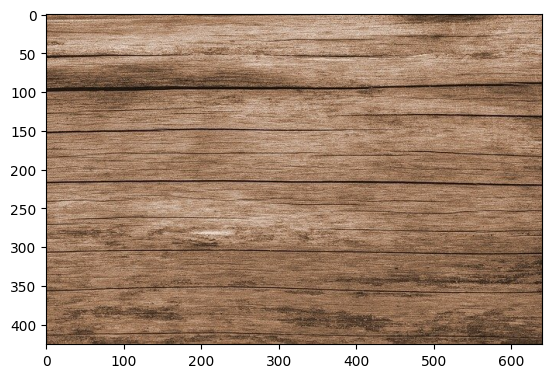

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image_filter.jpg')
plt.imshow(image[:,:,::-1])

<h4>Applying the Identity Kernel to an Image in OpenCV</h4>

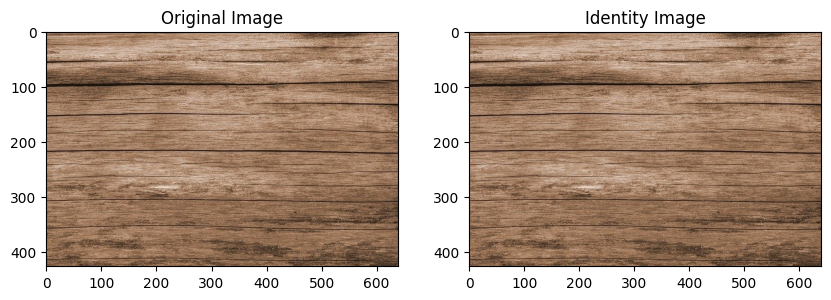

In [3]:
# The identity kernel is a square matrix, where the middle element is 1, and all other elements are zero. A 3×3 identity kernel
# 0 0 0
# 0 1 0
# 0 0 0
# What makes an identity matrix special is that multiplying it with any other matrix will return the original matrix. 

kernel_identity = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])

# filter2D() function can be used to apply kernel to an image.
# Where ddepth is the desired depth of final image. ddepth is -1 if...
# ... depth is same as original or source image.
identity = cv2.filter2D(src=image, ddepth=-1, kernel=kernel_identity)

plt.figure(figsize=[10,5])
plt.subplot(121); plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.title("Original Image")
plt.subplot(122); plt.imshow(cv2.cvtColor(identity, cv2.COLOR_BGR2RGB)); plt.title("Identity Image")
plt.show()

<h4>Blurring an Image using a Custom 2D-Convolution Kernel</h4>

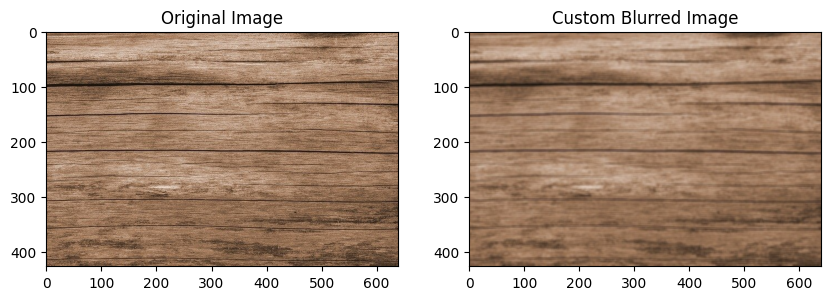

In [5]:
kernel_blurr_custom = np.ones((5, 5), np.float32) / 25 # chia cho 25 để thực hiện chuẩn hóa kernel
image_blurr = cv2.filter2D(src=image, ddepth=-1, kernel=kernel_blurr_custom)

# Blurring an Image Using OpenCV’s Built-In Function
# img_blur = cv2.blur(src=image, ksize=(5,5))

plt.figure(figsize=[10,5])
plt.subplot(121); plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.title("Original Image")
plt.subplot(122); plt.imshow(cv2.cvtColor(image_blurr, cv2.COLOR_BGR2RGB)); plt.title("Custom Blurred Image")
plt.show()

<h4>Applying Gaussian Blurring to an Image in OpenCV</h4>

Bộ lọc Gauss là bộ lọc không gian vì nó quan tâm tới khoảng cách của các lân cận tới pixel trung tâm để tính trọng số 

<div>Gauss Kernel 5x5</div>
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/f91401a3e97428f14862afa1c781c55f4157580b'>

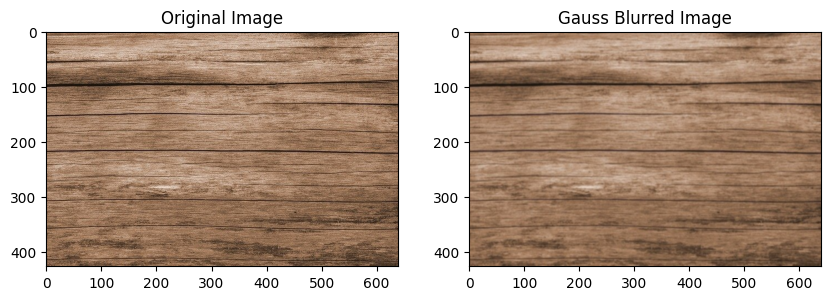

In [16]:
# Gauss blur trong OpenCV
gaussian_blur = cv2.GaussianBlur(src=image, ksize=(5,5), sigmaX=0, sigmaY=0)

plt.figure(figsize=[10,5])
plt.subplot(121); plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.title("Original Image")
plt.subplot(122); plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB)); plt.title("Gauss Blurred Image")
plt.show()

<h4>Applying Median Blurring to an Image in OpenCV</h4>

Bộ lọc median là bộ lọc cường độ vì nó quan tâm tới trung bình cường độ, và bộ lọc median đặc biệt hữu ích trong vấn đề xử lý nhiễu

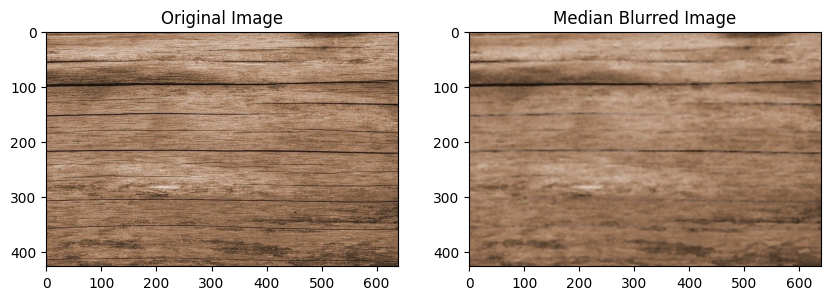

In [8]:
# In median blurring, each pixel in the source image is replaced by the median value of the image pixels in the kernel area.
median_blur = cv2.medianBlur(src=image, ksize=5) # tương đương với kernel_blurr_custom = np.ones((5, 5), np.float32) / 25

plt.figure(figsize=[10,5])
plt.subplot(121); plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.title("Original Image")
plt.subplot(122); plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB)); plt.title("Median Blurred Image")
plt.show()

<h4>Sharpening an Image Using Custom 2D-Convolution Kernels</h4>

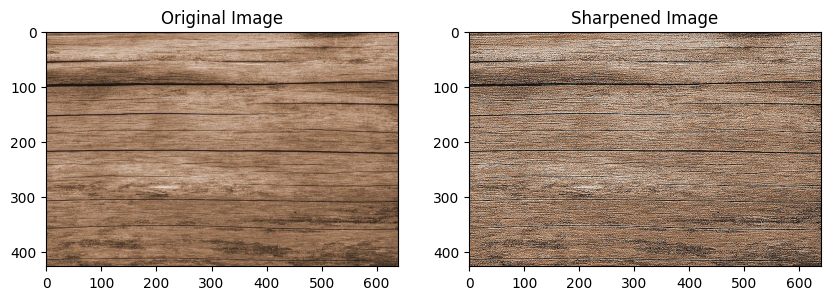

In [17]:
kernel_sharpen = np.array([[0, -1,  0],
                           [-1,  5, -1],
                           [0, -1,  0]])
sharp_img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel_sharpen)

plt.figure(figsize=[10,5])
plt.subplot(121); plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.title("Original Image")
plt.subplot(122); plt.imshow(cv2.cvtColor(sharp_img, cv2.COLOR_BGR2RGB)); plt.title("Sharpened Image")
plt.show()

<img src="https://images.viblo.asia/470abaeb-08f4-4b0c-98a9-873bf5764f2a.png" style="margin-left: 200px">

<h4>Applying Bilateral Filtering to an Image in OpenCV</h4>

Chúng ta đã thấy rằng bộ lọc Gaussian lấy vùng lân cận xung quanh pixel và tìm mức trung bình có trọng số Gaussian của nó. Bộ lọc Gaussian này chỉ là một hàm của không gian, nghĩa là các pixel lân cận được xem xét trong khi lọc. Nó không xem xét liệu các pixel có giá trị cường độ gần như giống nhau hay không và không xem xét liệu pixel có nằm trên một cạnh hay không. Kết quả là các bộ lọc Gaussian có xu hướng làm mờ các cạnh, điều này là không mong muốn.

Bộ lọc song phương cũng sử dụng bộ lọc Gaussian trong miền không gian, nhưng nó cũng sử dụng thêm một thành phần bộ lọc Gaussian (nhân) là hàm của sự khác biệt cường độ pixel. Hàm Gaussian của không gian đảm bảo rằng chỉ các pixel là 'láng giềng không gian' mới được xem xét để lọc, trong khi thành phần Gaussian được áp dụng trong miền cường độ (hàm Gaussian về chênh lệch cường độ) đảm bảo rằng chỉ những pixel có cường độ tương tự như cường độ của trung tâm pixel ("hàng xóm cường độ") được đưa vào để tính giá trị cường độ mờ. Kết quả là, phương pháp này bảo toàn các cạnh, vì đối với các pixel nằm gần các cạnh, các pixel lân cận được đặt ở phía bên kia của cạnh và do đó thể hiện sự thay đổi cường độ lớn khi so sánh với pixel trung tâm, sẽ không được đưa vào để làm mờ.

Hàm "cv2.bilateralFilter" trong OpenCV được sử dụng để làm mờ ảnh mà vẫn giữ được các cạnh sắc nét. Đây là một trong những phương pháp lọc tiên tiến nhất cho mục đích này vì nó kết hợp cả thông tin về không gian (khoảng cách giữa các pixel) và thông tin về màu sắc để tính toán giá trị mới cho mỗi pixel.

<ul>
    <li>Bộ lọc không gian (Spatial filter): Giảm ảnh hưởng của các pixel xa hơn trong không gian.</li>
    <li>Bộ lọc phạm vi (Range filter): Giảm ảnh hưởng của các pixel có sự khác biệt lớn về cường độ (màu sắc).</li>
</ul>

<ul>Các tham số của hàm:
<li>src: Ảnh đầu vào.</li>
<li>d: Đường kính của vùng lân cận mà bộ lọc sẽ tính toán. Nếu d là một số không dương, nó sẽ được tính từ sigmaSpace.</li>
<li>sigmaColor: Độ lệch chuẩn trong không gian màu. Giá trị lớn hơn có nghĩa là các màu ở xa nhau hơn sẽ được trộn lẫn hơn.</li>
<li>sigmaSpace: Độ lệch chuẩn trong không gian tọa độ. Giá trị lớn hơn có nghĩa là các pixel xa hơn có ảnh hưởng lớn hơn.</li>
</ul>

Bộ lọc Bilateral giữ được các cạnh sắc nét trong khi làm mờ các vùng không có cạnh, vì các pixel ở hai bên của một cạnh thường có sự khác biệt màu sắc lớn, nên trọng số của chúng sẽ thấp.

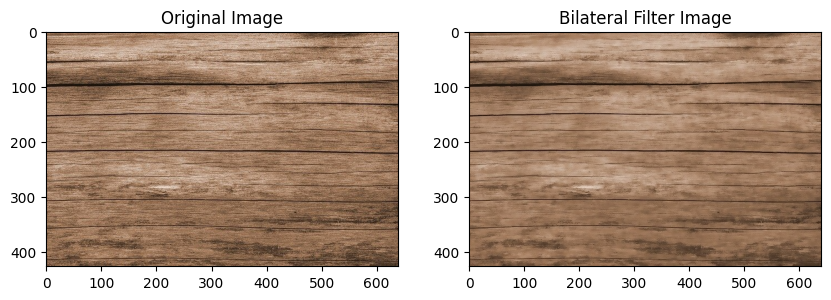

In [18]:
#  --> bilateralFilter(src, d, sigmaColor, sigmaSpace)
bilateral_filter = cv2.bilateralFilter(src=image, d=9, sigmaColor=75, sigmaSpace=75)

plt.figure(figsize=[10,5])
plt.subplot(121); plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.title("Original Image")
plt.subplot(122); plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB)); plt.title("Bilateral Filter Image")
plt.show()

<h4>Changing the contrast and brightness of an image</h4>

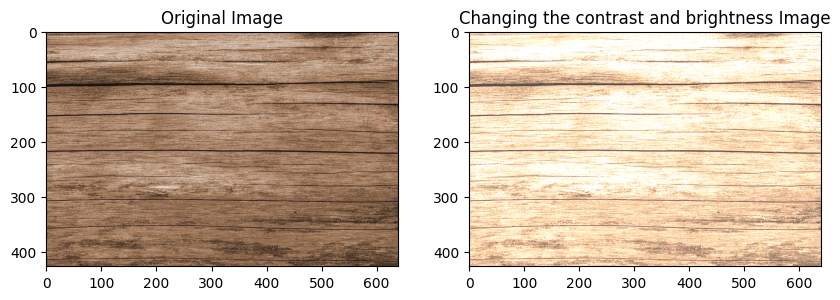

In [19]:
# Use α (the contrast) và β (the brightness): --> g(i,j) = α * f(i,j) + β
# --> cv2.convertScaleAbs
change_image = cv2.convertScaleAbs(image, alpha=1.5, beta=50)

plt.figure(figsize=[10,5])
plt.subplot(121); plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.title("Original Image")
plt.subplot(122); plt.imshow(cv2.cvtColor(change_image, cv2.COLOR_BGR2RGB)); plt.title("Changing the contrast and brightness Image")
plt.show()

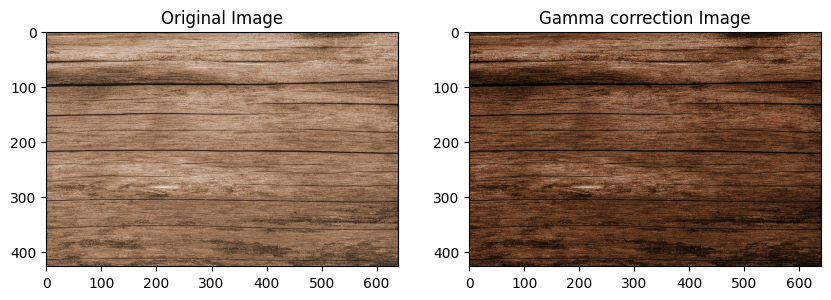

In [20]:
# Use Gamma correction (Iout = (Iin/255)^γ * 255
# Nếu 𝛾 < 1, hình ảnh sẽ trở nên sáng hơn. Nếu 𝛾 > 1, hình ảnh sẽ trở nên tối hơn.

def adjust_gamma(image, gamma=1.0):
    # Tạo bảng tra cứu để ánh xạ các giá trị pixel
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    
    # Áp dụng gamma correction sử dụng bảng tra cứu
    return cv2.LUT(image, table)

# Thay đổi độ sáng và độ tương phản bằng gamma correction
gamma = 0.5 
gamma_image = adjust_gamma(image, gamma=gamma)

plt.figure(figsize=[10,5])
plt.subplot(121); plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.title("Original Image")
plt.subplot(122); plt.imshow(cv2.cvtColor(gamma_image, cv2.COLOR_BGR2RGB)); plt.title("Gamma correction Image")
plt.show()